#  **#REFERENCES**

- https://www.geeksforgeeks.org/how-to-automate-data-cleaning-in-python/
- https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd
- https://www.geeksforgeeks.org/handling-missing-data-with-knn-imputer/


# **Data Cleaning and Visualization Report**

This notebook provides a structured approach to cleaning and visualizing data.
The workflow includes:

1. **Data Cleaning**: Identifying and handling missing or inconsistent data points.
2. **Data Visualization**: Using visual methods to explore and communicate insights from the data.

References and libraries used are mentioned below.



## **Data Cleaning**

This section focuses on preparing the data by addressing issues such as missing values, duplicate entries, and messy column names.
Each step is documented to ensure reproducibility.


## *Reading Data*

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
#importing needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import missingno as msno

In [9]:
#creating a dataframe
df = pd.read_csv('C:\\Users\\m1502\\Desktop\\stat112f\\Trendyol_Sales_Data_Dirty.csv')

In [10]:
#the variables and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            1024 non-null   float64
 1   month           1013 non-null   float64
 2    CITY           1067 non-null   object 
 3   CatEgory        1063 non-null   object 
 4   PayMent_methoD  1070 non-null   object 
 5   DEVICE_type     1058 non-null   object 
 6   PROMOTion_used  1070 non-null   object 
 7   CustSegment     1061 non-null   object 
 8   ORDer_Value     1015 non-null   float64
 9   Items sold      1000 non-null   float64
 10  shipping_cost   1100 non-null   object 
 11  Delivery_time   1011 non-null   float64
 12  Product_rating  1014 non-null   float64
 13  DiscOUNt        1015 non-null   float64
dtypes: float64(7), object(7)
memory usage: 120.4+ KB


In [11]:
# number of (rows, columns)
df.shape

(1100, 14)

In [12]:
#first look of the data
df.head()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
0,2020.0,4.0,@Bursa,NaN,Cr3dit C@rd,D3sktop,@Yes,@New,477.75,10.0,32.34 TRY,6.0,4.7,113.97
1,2023.0,11.0,@NA,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56 TRY,2.0,4.6,103.36
2,2011.0,5.0,Samsun,@NA,E-W@ll3t,Desktop,No,@Returning,264.94,3.0,24.97 TRY,3.0,3.4,22.84
3,2017.0,2.0,diyarbakir,clothing,@E-Wallet,Mobil3,YES,@NA,353.31,8.0,36.25 TRY,4.0,3.6,59.85
4,2013.0,6.0,BURSA,NaN,CREDIT CARD,Desktop,YES,@Returning,NaN,6.0,43.16 TRY,4.0,4.2,7.82


In [13]:
df.tail()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
1095,2019.0,6.0,diyarbakir,@Beauty,DEBIT CARD,Desktop,NA,@Returning,369.58,NaN,18.53 TRY,1.0,4.1,96.98
1096,2017.0,12.0,Ad@n@,Clothing,E-W@ll3t,Tablet,@Yes,returning,308.40,9.0,26.38 TRY,2.0,4.3,35.76
1097,2019.0,8.0,konya,@Home,credit card,@Desktop,Y3s,RETURNING,446.99,7.0,58.41 TRY,7.0,3.1,94.61
1098,2013.0,4.0,ANKARA,Clothing,@Debit Card,DESKTOP,@Yes,@New,454.18,3.0,63.72 TRY,4.0,3.8,51.76
1099,2016.0,3.0,Kony@,clothing,na,tablet,@No,@New,202.42,NaN,14.81 TRY,6.0,NaN,48.62


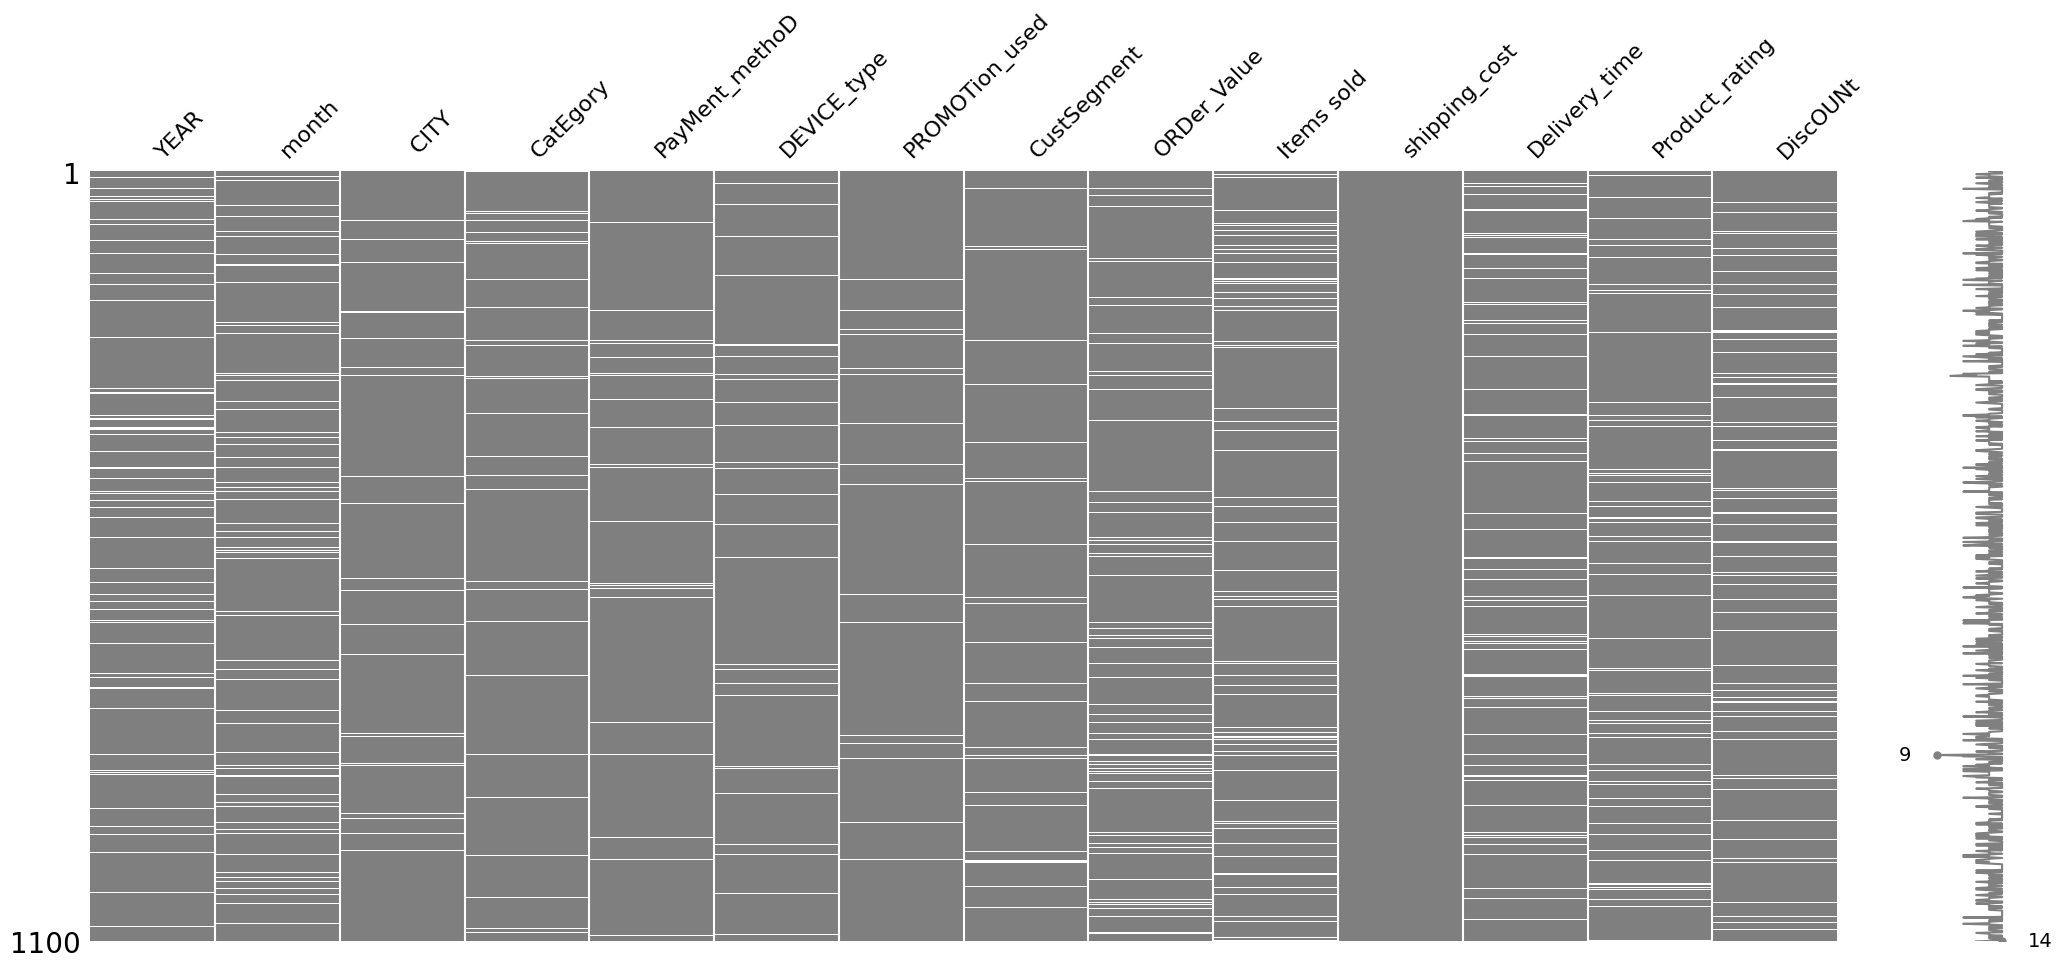

In [14]:
#visualization of Na's
msno.matrix(df, color = (0.5, 0.5, 0.5));

In [15]:
#Generates summary statistics for numerical columns.
df.describe()

,YEAR,month,ORDer_Value,Items sold,Delivery_time,Product_rating,DiscOUNt
count,1024.000000,1013.000000,1015.000000,1000.000000,1011.000000,1014.000000,1015.000000
mean,2016.387695,6.593287,284.198039,5.598000,4.057369,3.986588,44.229665
std,4.052091,3.443565,128.439806,2.764786,1.971247,0.567321,33.676211
min,2010.000000,1.000000,50.530000,1.000000,1.000000,3.000000,0.180000
25%,2013.000000,4.000000,174.585000,3.000000,2.000000,3.500000,16.865000
50%,2016.000000,7.000000,287.700000,6.000000,4.000000,4.000000,35.670000
75%,2020.000000,10.000000,394.640000,8.000000,6.000000,4.500000,66.430000
max,2023.000000,12.000000,499.760000,10.000000,7.000000,5.000000,145.120000


In [16]:
#names of the columns are not clear
df.columns

Index(['YEAR', 'month ', ' CITY', 'CatEgory', 'PayMent_methoD', 'DEVICE_type',
       'PROMOTion_used', 'CustSegment', 'ORDer_Value', 'Items sold',
       'shipping_cost', 'Delivery_time', 'Product_rating', 'DiscOUNt'],
      dtype='object')

In [17]:
#Changing columns names
df.columns = ['year', 'month', 'city', 'category', 'payment method', 'device type',
       'promotion used', 'customer segment', 'order value', 'items sold',
       'shipping cost', 'delivery time', 'product rating', 'discount']
df.columns

Index(['year', 'month', 'city', 'category', 'payment method', 'device type',
       'promotion used', 'customer segment', 'order value', 'items sold',
       'shipping cost', 'delivery time', 'product rating', 'discount'],
      dtype='object')

In [18]:
#Standardizes and cleans specific columns by fixing formatting issues, replacing invalid values, and normalizing text.
df['city'] = df['city'].str.replace('@', '').str.title()

df['category'] = df['category'].replace({'@NA': np.nan})

df['payment method'] = df['payment method'].replace({
    'Cr3dit C@rd': 'Credit Card',
    'E-W@ll3t': 'E-Wallet',
    '@E-Wallet': 'E-Wallet',
    'CREDIT CARD': 'Credit Card'
})

df['device type'] = df['device type'].replace({
    'D3sktop': 'Desktop',
    'Mobil3': 'Mobile'
})

df['promotion used'] = df['promotion used'].str.replace('@', '').str.title()

df['customer segment'] = df['customer segment'].str.replace('@', '')


In [19]:
# converted NaN all null values.
nonValue = ["@na","NaN","@NA","na","NA","none","None","empty","NONE",None,""]
df = df.replace(nonValue ,np.nan)

In [20]:
#Selects all numeric columns from the DataFrame.
numeric_columns = df.select_dtypes(include=['number']);

In [21]:
#Calculates the number of missing values in each numeric column.
df[numeric_columns.columns].isna().sum()

year               76
month              87
order value        85
items sold        100
delivery time      89
product rating     86
discount           85
dtype: int64

In [22]:
#This line displays info about the “shipping_cost” column.
df['shipping cost'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1100 entries, 0 to 1099
Series name: shipping cost
Non-Null Count  Dtype 
--------------  ----- 
1100 non-null   object
dtypes: object(1)
memory usage: 8.7+ KB


In [23]:
#This line removes the ’ TRY’ substring from the “shipping_cost” column values, if not NaN.
df['shipping cost'] = df['shipping cost'].apply(lambda x: x.replace(' TRY', '') if pd.notna(x) else x)

#This line converts the “shipping_cost” column to numeric, setting errors as NaN.
df['shipping cost'] = pd.to_numeric(df['shipping cost'], errors='coerce')


In [24]:
df['shipping cost'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1100 entries, 0 to 1099
Series name: shipping cost
Non-Null Count  Dtype  
--------------  -----  
1018 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


In [25]:
df.describe()

,year,month,order value,items sold,shipping cost,delivery time,product rating,discount
count,1024.000000,1013.000000,1015.000000,1000.000000,1018.000000,1011.000000,1014.000000,1015.000000
mean,2016.387695,6.593287,284.198039,5.598000,28.647544,4.057369,3.986588,44.229665
std,4.052091,3.443565,128.439806,2.764786,15.220923,1.971247,0.567321,33.676211
min,2010.000000,1.000000,50.530000,1.000000,3.820000,1.000000,3.000000,0.180000
25%,2013.000000,4.000000,174.585000,3.000000,16.310000,2.000000,3.500000,16.865000
50%,2016.000000,7.000000,287.700000,6.000000,27.170000,4.000000,4.000000,35.670000
75%,2020.000000,10.000000,394.640000,8.000000,38.610000,6.000000,4.500000,66.430000
max,2023.000000,12.000000,499.760000,10.000000,74.640000,7.000000,5.000000,145.120000


## *Handling Missing Values with KNN*

KNN (K-Nearest Neighbors) is a machine learning algorithm used for classification and regression. In the context of data imputation, KNN is used to fill missing values by finding the “k” most similar rows (neighbors) based on other features and using their values to estimate the missing data. The idea is that similar data points are likely to have similar values for missing attributes.

In [26]:
df[numeric_columns.columns].isna().sum()

year               76
month              87
order value        85
items sold        100
delivery time      89
product rating     86
discount           85
dtype: int64

In [27]:
#select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

#This line imputes missing values in the numeric columns using the KNN (K-Nearest Neighbors) imputer.
imputed_data = imputer.fit_transform(numeric_columns)

#This line updates the numeric columns in the DataFrame with the imputed values.
df[numeric_columns.columns] = imputed_data

In [28]:
df[numeric_columns.columns].isna().sum()

year              0
month             0
order value       0
items sold        0
shipping cost     0
delivery time     0
product rating    0
discount          0
dtype: int64

In [29]:
#This line returns the number of unique values in each column of the DataFrame data.
df.nunique()

year                 42
month                35
city                 49
category             31
payment method       19
device type          16
promotion used        7
customer segment     11
order value         994
items sold           29
shipping cost       916
delivery time        24
product rating       65
discount            963
dtype: int64

## *Arranging Year and Month Columns and Creating a Date Column*

In [30]:
#Prints the count of missing values in the ‘year’ column.
print(df['year'].isna().sum())

0


In [31]:
df['year'].unique()

array([2020. , 2023. , 2011. , 2017. , 2013. , 2022. , 2012. , 2019. ,
       2015. , 2014. , 2016. , 2018. , 2018.4, 2021. , 2016.8, 2010. ,
       2017.2, 2014.6, 2016.2, 2017.4, 2015.8, 2014.8, 2017.6, 2013.8,
       2018.6, 2021.6, 2016.6, 2015.4, 2019.6, 2017.8, 2013.6, 2020.2,
       2018.8, 2016.4, 2015.2, 2018.2, 2014.2, 2011.8, 2012.6, 2019.2,
       2019.4, 2020.4])

In [32]:
#Converts the “year” and “month” columns to integers.
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

In [33]:
df.head()

,year,month,city,category,payment method,device type,promotion used,customer segment,order value,items sold,shipping cost,delivery time,product rating,discount
0,2020,4,Bursa,NaN,Credit Card,Desktop,Yes,New,477.750,10.0,32.34,6.0,4.7,113.97
1,2023,11,Na,Toys,Debit Card,Desktop,No,Returning,369.630,4.0,34.56,2.0,4.6,103.36
2,2011,5,Samsun,NaN,E-Wallet,Desktop,No,Returning,264.940,3.0,24.97,3.0,3.4,22.84
3,2017,2,Diyarbakir,clothing,E-Wallet,Mobile,Yes,NaN,353.310,8.0,36.25,4.0,3.6,59.85
4,2013,6,Bursa,NaN,Credit Card,Desktop,Yes,Returning,354.794,6.0,43.16,4.0,4.2,7.82


In [34]:
print(df['month'].isna().sum())

0


In [35]:
df['month'].unique()

array([ 4, 11,  5,  2,  6,  3,  8,  7, 10, 12,  1,  9])

In [36]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1)) # combine month and year and assign day 1

In [37]:
#dropped year and month
df.drop(['year', 'month'], axis=1, inplace=True)

In [38]:
df.head()

,city,category,payment method,device type,promotion used,customer segment,order value,items sold,shipping cost,delivery time,product rating,discount,date
0,Bursa,NaN,Credit Card,Desktop,Yes,New,477.750,10.0,32.34,6.0,4.7,113.97,2020-04-01
1,Na,Toys,Debit Card,Desktop,No,Returning,369.630,4.0,34.56,2.0,4.6,103.36,2023-11-01
2,Samsun,NaN,E-Wallet,Desktop,No,Returning,264.940,3.0,24.97,3.0,3.4,22.84,2011-05-01
3,Diyarbakir,clothing,E-Wallet,Mobile,Yes,NaN,353.310,8.0,36.25,4.0,3.6,59.85,2017-02-01
4,Bursa,NaN,Credit Card,Desktop,Yes,Returning,354.794,6.0,43.16,4.0,4.2,7.82,2013-06-01


items_sold and delivery_time values have to be integer

In [39]:
#Returns the unique values in the “items_sold” column.
df['items sold'].unique()

array([10. ,  4. ,  3. ,  8. ,  6. ,  5. ,  7.8,  7. ,  1. ,  2. ,  4.2,
        9. ,  6.6,  7.2,  6.4,  3.8,  6.2,  8.4,  4.8,  5.8,  5.2,  7.4,
        4.6,  6.8,  5.6,  3.4,  3.6,  5.4,  4.4])

In [40]:
#Converts the “items_sold” column to integers.
df['items sold'] = df['items sold'].astype(int)

In [41]:
df['items sold'].unique()

array([10,  4,  3,  8,  6,  5,  7,  1,  2,  9])

In [42]:
df['delivery time'] = df['delivery time'].astype(int)

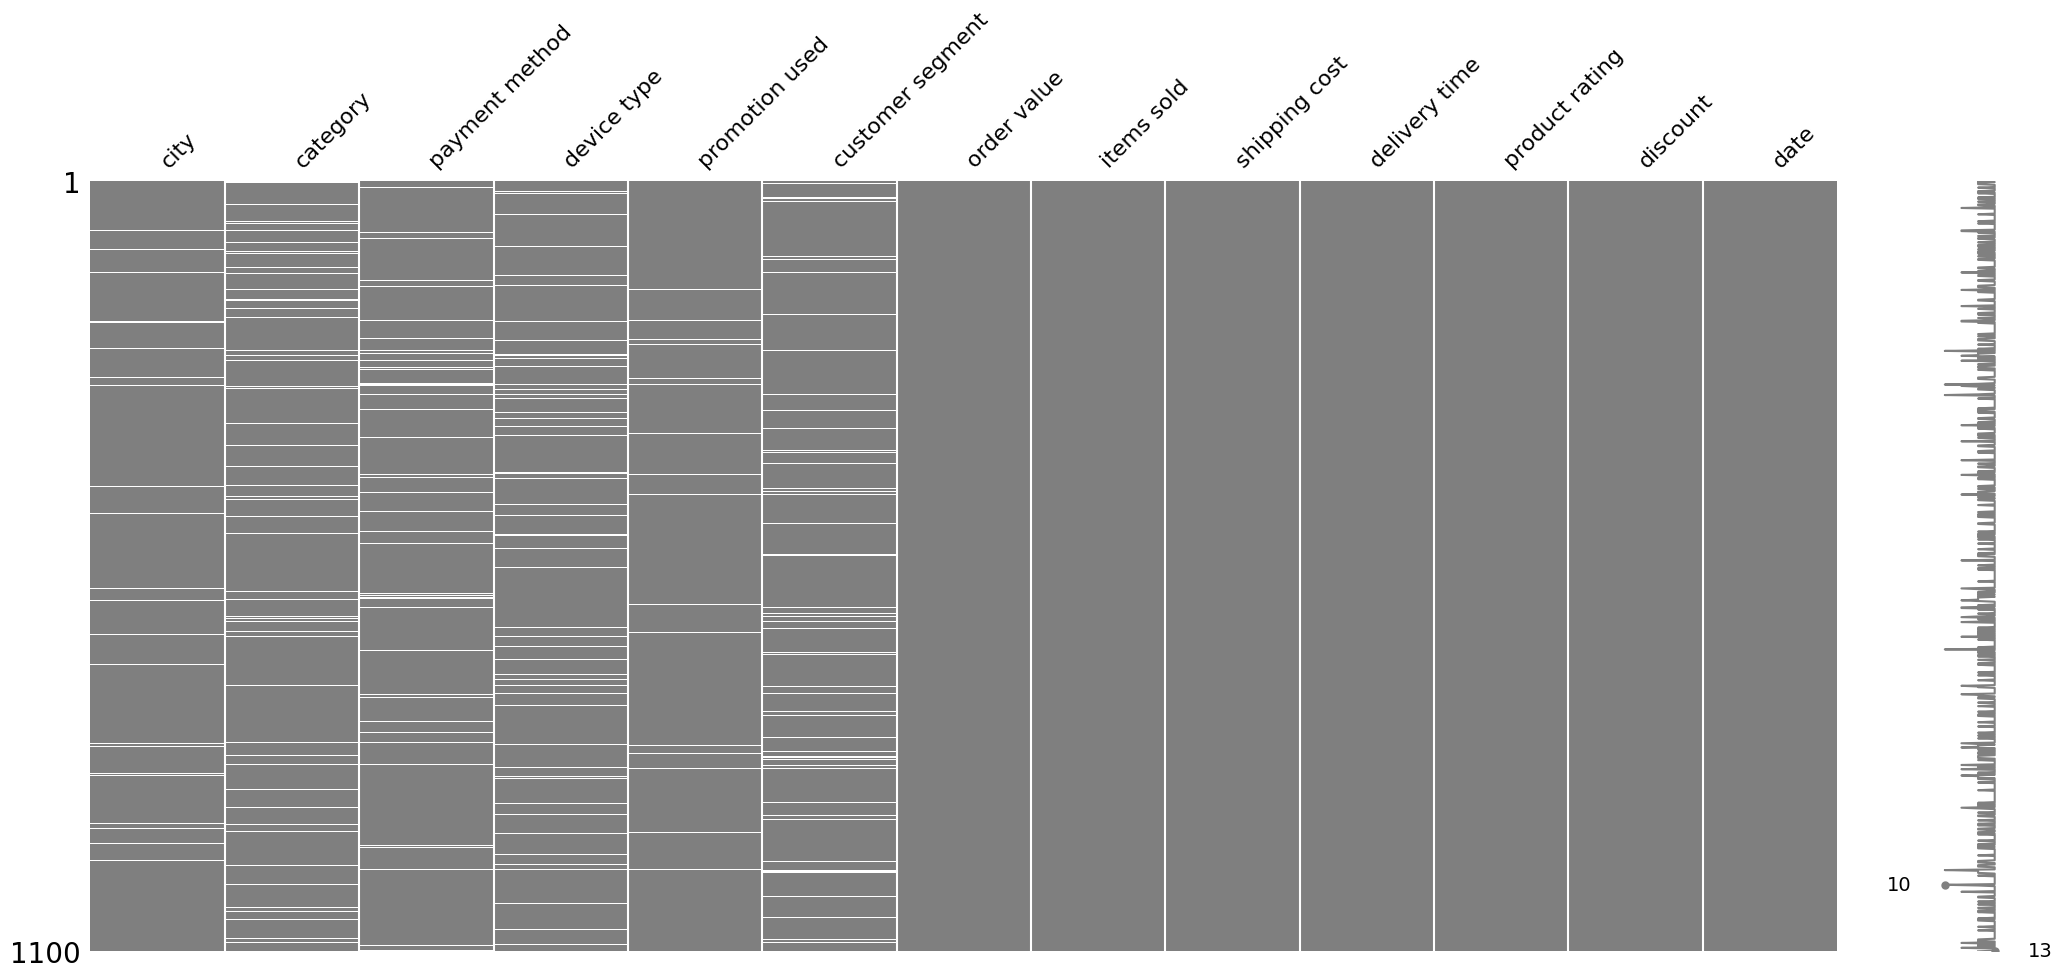

In [43]:
msno.matrix(df, color = (0.5, 0.5, 0.5));

## *Arranging Object Type Columns*

-  ###  City

In [44]:
#Counts the number of missing values (NaN) in the “city” column.
df['city'].isna().sum()

np.int64(33)

In [45]:
df["city"].unique()

array(['Bursa', 'Na', 'Samsun ', 'Diyarbakir', 'Smsun', 'Na ', 'Istanbul',
       'Trbzon', 'Malatya ', 'Gaziantep', 'Diyarbakir ', 'Van ', nan,
       'Kayseri', 'Trabzon', 'Kayseri ', 'Konya', 'Van', 'Eskişehir',
       'Ankara', 'Samsun', 'Izmir', 'Istanbul ', 'Eskiş3Hir', 'Adana',
       'Burs', 'Mlty', 'Vn', 'Malatya', 'Kys3Ri', 'Izmir ', 'Antalya ',
       'Eskişehir ', 'Ankara ', 'Ankr', 'Mersin ', 'Gaziantep ', 'Adn',
       'Antalya', 'M3Rsin', 'Diyrbkir', 'Mersin', 'Istnbul', 'Trabzon ',
       'Gzint3P', 'Adana ', 'Antly', 'Konya ', 'Kony', 'Bursa '],
      dtype=object)

In [46]:
#Cleans the “city” column by removing extra spaces, replacing “@” with an empty string, and capitalizing each word.
df['city'] = df['city'].str.strip().str.replace("@","").str.title()

In [47]:
#Replaces the value “Na” with NaN in the “city” column.
df["city"]= df["city"].replace("Na",np.nan)

In [48]:
#Replaces incorrect or abbreviated city names in the “city” column with their correct versions.
df["city"] = df["city"].replace({
                                     "Diyarbakir":"Diyarbakır",
                                     "Smsun":"Samsun",
                                     "Istanbul":"İstanbul",
                                     "Trbzon":"Trabzon",
                                     "Izmir":"İzmir",
                                     "Eskiş3Hir":"Eskişehir",
                                     "Burs":"Bursa",
                                     "Mlty":"Malatya",
                                     "Vn":"Van",
                                     "Kys3Ri":"Kayseri",
                                     "Ankr":"Ankara",
                                     "Adn":"Adana",
                                     "M3Rsin":"Mersin",
                                     "Diyrbkir":"Diyarbakır",
                                     "Istnbul":"İstanbul",
                                     "Gzint3P":"Gaziantep",
                                     "Antly":"Antalya",
                                    "Kony":"Konya"})

In [49]:
#Fills missing values in the “city” column with the most frequent city name, “Ankara”.
modeCity = df["city"].mode()[0]
modeCity #Ankara
df["city"] = df["city"].fillna(modeCity)

In [50]:
df["city"].unique()

array(['Bursa', 'Ankara', 'Samsun', 'Diyarbakır', 'İstanbul', 'Trabzon',
       'Malatya', 'Gaziantep', 'Van', 'Kayseri', 'Konya', 'Eskişehir',
       'İzmir', 'Adana', 'Antalya', 'Mersin'], dtype=object)

- ### Category

In [51]:
df["category"].unique()

array([nan, 'Toys ', 'clothing', 'NA ', '@Clothing', 'Clothing', 'Hom3',
       'beauty', 'Beauty ', 'TOYS', 'Home ', 'El3ctronics', 'HOME',
       'BOOKS', 'B3@uty', '@Toys', 'BEAUTY', 'home', 'ELECTRONICS',
       'electronics', 'Electronics ', '@Electronics', 'Toys', 'books',
       'Books', 'Clothing ', '@Beauty', '@Home', 'Books ', '@Books',
       'CLOTHING', 'toys'], dtype=object)

In [52]:
#Cleans the “category” column by removing extra spaces, replacing “@” with an empty string, changing “3” to “e”, capitalizing each word, and replacing “Na” with NaN.
df['category'] = df['category'].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["category"] = df["category"].replace("Na",np.nan)

In [53]:
df["category"] = df["category"].replace("Beuty","Beauty")

In [54]:
#Fills missing values in the “category” column with the most frequent category, “clothing”.
modeCategory= df["category"].mode()[0]
modeCategory #clothing
df["category"] = df["category"].fillna(modeCategory)

In [55]:
df["category"].unique()

array(['Clothing', 'Toys', 'Home', 'Beauty', 'Electronics', 'Books'],
      dtype=object)

In [56]:
df["category"].isnull().sum()

np.int64(0)

- ### Payment Method

In [57]:
#Cleans the “payment_method” column by removing extra spaces, replacing “@” with an empty string, changing “3” to “e”, capitalizing each word, and replacing “Na” with NaN.
df['payment method'] = df['payment method'].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["payment method"] = df["payment method"].replace("Na",np.nan)

In [58]:
#Replaces incorrect or abbreviated payment method names in the “payment_method” column with their correct versions.
df['payment method'] = df['payment method'].replace({"Credit Crd":"Credit Card",
                                                     "E-Wllet":"E-Wallet",
                                                     "Csh On Delivery":"Cash On Delivery",
                                                     "Debit Crd":"Debit Card",
                                                     })

In [59]:
#Fills missing values in the “payment_method” column with the most frequent payment method, “credit card”.
mode_payment_method= df["payment method"].mode()[0]
mode_payment_method #credit card
df["payment method"] = df["payment method"].fillna(modeCategory)

In [60]:
df['payment method'].unique()

array(['Credit Card', 'Debit Card', 'E-Wallet', 'Clothing',
       'Cash On Delivery'], dtype=object)

In [61]:
df["payment method"].isnull().sum() # 0

np.int64(0)

- ### Device Type

In [62]:
df["device type"].unique()

array(['Desktop', 'Desktop ', 'Mobile', 'desktop', 'Tablet ', 'TABLET',
       'tablet', 'Mobile ', nan, 'T@bl3t', 'mobile', 'NA ', 'DESKTOP',
       '@Mobile', '@Desktop', '@Tablet', 'MOBILE'], dtype=object)

In [63]:
#Cleans the “device_type” column by removing extra spaces, replacing “@” with an empty string, changing “3” to “e”, capitalizing each word, and replacing “Na” with NaN. Then, it returns the unique values in the “device_type” column.
df["device type"] = df["device type"].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["device type"] = df["device type"].replace("Na",np.nan)
df["device type"].unique()

array(['Desktop', 'Mobile', 'Tablet', nan, 'Tblet'], dtype=object)

In [64]:
df["device type"] = df["device type"].replace("Tblet","Tablet")

In [65]:
df["device type"].isnull().sum()

np.int64(95)

In [66]:
#we have 95 null values and we imputated with mode
modeDevice = df["device type"].mode()[0]
modeDevice #Desktop
df["device type"]=df["device type"].fillna(modeDevice)

In [67]:
df["device type"].isnull().sum() # 0

np.int64(0)

- ### Promotion Used

In [68]:
df["promotion used"].unique()

array(['Yes', 'No ', 'No', 'Yes ', 'Na ', 'Y3S', 'Na', nan], dtype=object)

In [69]:
#Cleans the “promotion_used” column by removing extra spaces, replacing “@” with an empty string, changing “3” to “e”, capitalizing each word, and replacing “Na” with NaN.
df["promotion used"] = df["promotion used"].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["promotion used"] = df["promotion used"].replace("Na",np.nan)

In [70]:
df["promotion used"].unique()

array(['Yes', 'No', nan], dtype=object)

In [71]:
df["promotion used"].isnull().sum()

np.int64(83)

In [72]:
#we have 83 null values we imputated with mode
modePromotion = df["promotion used"].mode()[0]
modePromotion #Yes
df["promotion used"] = df["promotion used"].fillna(modePromotion)


In [73]:
df["promotion used"].isnull().sum() # 0

np.int64(0)

- ### Customer Segment

In [74]:
df["customer segment"].unique()

array(['New', 'Returning', nan, 'RETURNING', 'R3turning', 'New ', 'new',
       'Returning ', 'NEW', 'returning', 'N3w', 'NA '], dtype=object)

In [75]:
#Cleans the “custsegment” column by removing extra spaces, replacing “@” with an empty string, changing “3” to “e”, capitalizing each word, and replacing “Na” with NaN.
df["customer segment"] = df["customer segment"].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["customer segment"] = df["customer segment"].replace("Na",np.nan)

In [76]:
df["customer segment"].isnull().sum()

np.int64(84)

In [77]:
# we have 84 null values we imputeted with mode
modeCustomerSegment = df["customer segment"].mode()[0]
modeCustomerSegment #new
df["customer segment"] = df["customer segment"].fillna(modeCustomerSegment)

In [78]:
df["customer segment"].isnull().sum() # 0

np.int64(0)

## *Arranging Duplicated rows*

In [79]:
#Returns the count of duplicated rows in the DataFrame df.
df.duplicated().sum()

np.int64(100)

In [80]:
#Removes all duplicated rows from the DataFrame df, keeping only the first occurrence.
df = df.drop_duplicates()

In [81]:
df.duplicated().sum()

np.int64(0)

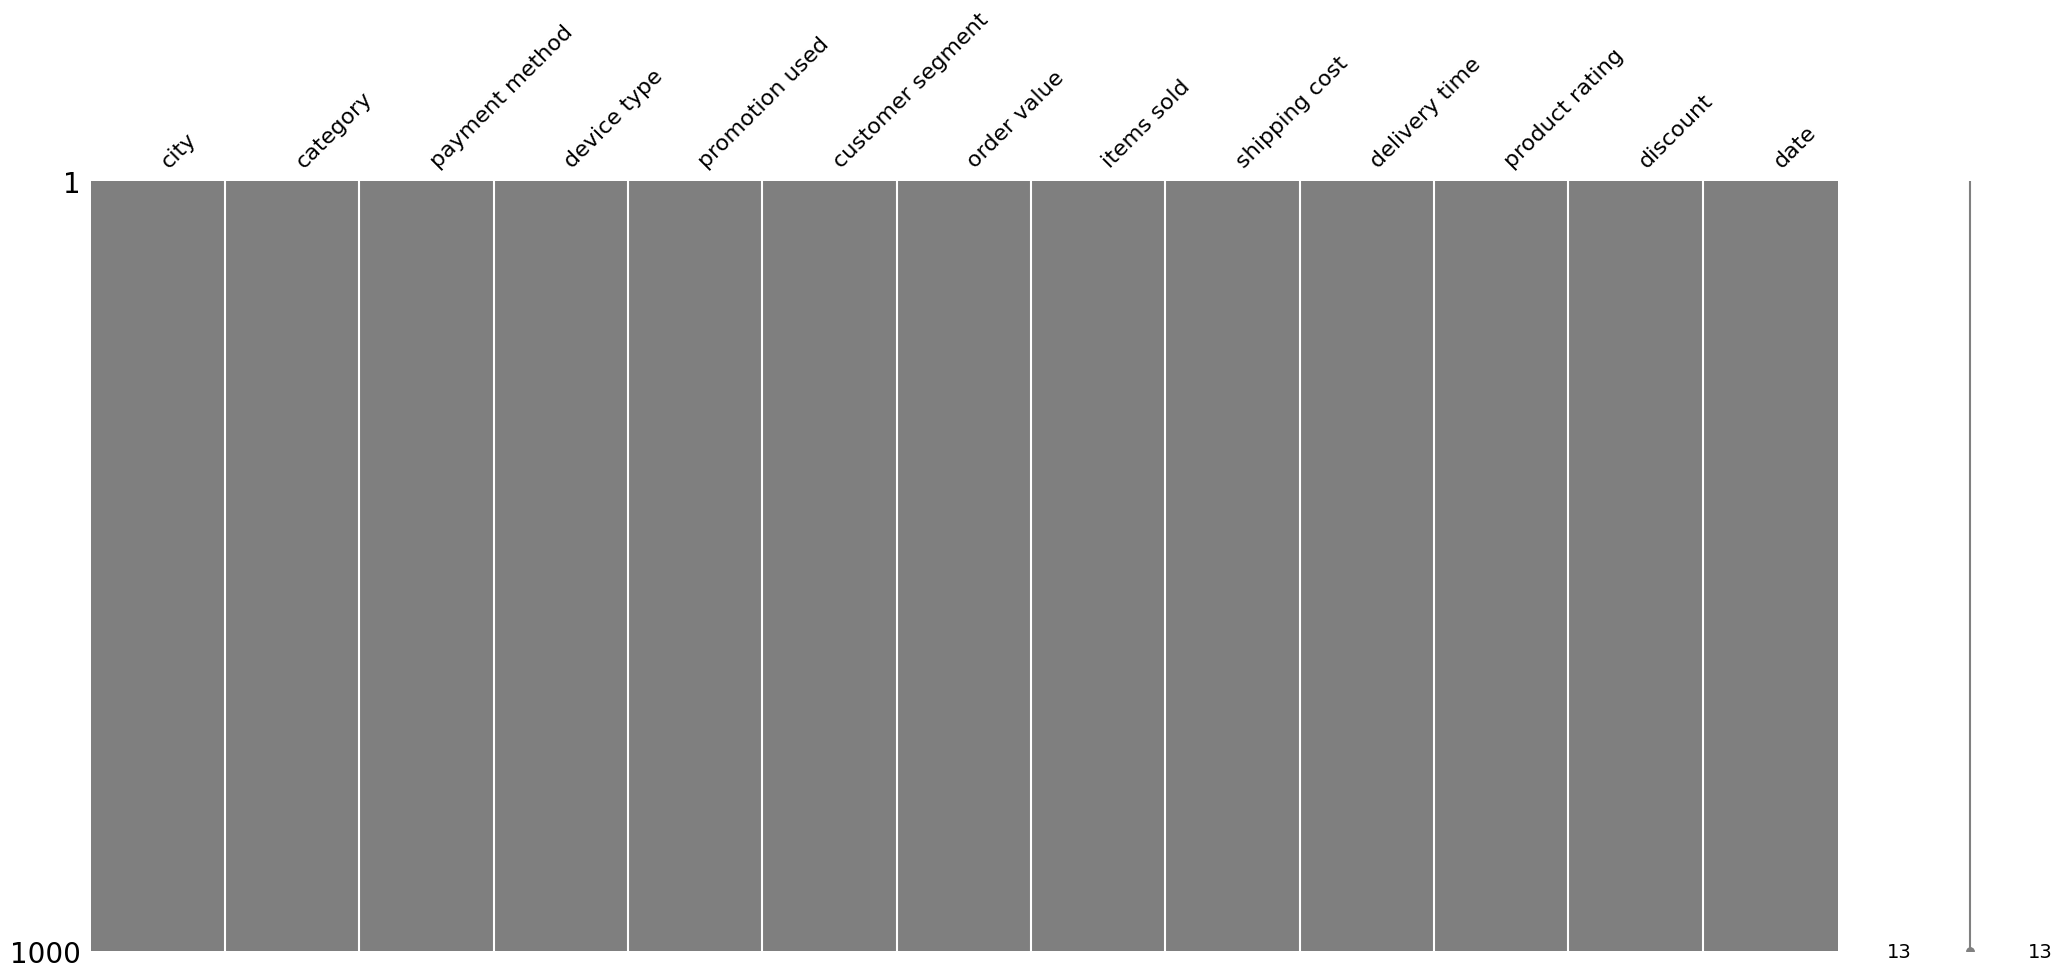

In [82]:
msno.matrix(df, color = (0.5, 0.5, 0.5));

In [83]:
df.head()

,city,category,payment method,device type,promotion used,customer segment,order value,items sold,shipping cost,delivery time,product rating,discount,date
0,Bursa,Clothing,Credit Card,Desktop,Yes,New,477.750,10,32.34,6,4.7,113.97,2020-04-01
1,Ankara,Toys,Debit Card,Desktop,No,Returning,369.630,4,34.56,2,4.6,103.36,2023-11-01
2,Samsun,Clothing,E-Wallet,Desktop,No,Returning,264.940,3,24.97,3,3.4,22.84,2011-05-01
3,Diyarbakır,Clothing,E-Wallet,Mobile,Yes,New,353.310,8,36.25,4,3.6,59.85,2017-02-01
4,Bursa,Clothing,Credit Card,Desktop,Yes,Returning,354.794,6,43.16,4,4.2,7.82,2013-06-01


In [84]:
df.isna().sum()

city                0
category            0
payment method      0
device type         0
promotion used      0
customer segment    0
order value         0
items sold          0
shipping cost       0
delivery time       0
product rating      0
discount            0
date                0
dtype: int64

## **Data Visualization**

- ## Boxplots and fixing outliers.

- ### Order Value

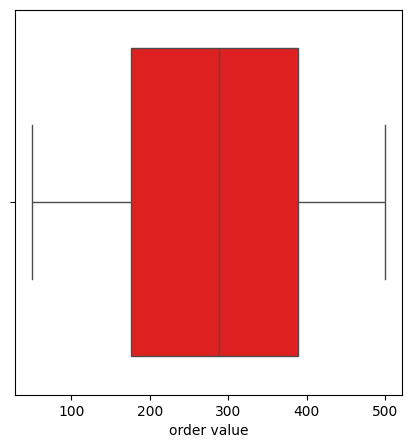

In [85]:
#Creates a boxplot for the “order_value” column in the DataFrame df with a red color, using a figure size of 5x5 inches.
plt.figure(figsize=(5,5))
sns.boxplot(x = 'order value', data = df, color = 'red');

In [86]:
#This loop calculates and prints the values for percentiles from 99.0 to 99.9 for the “order_value” column in the DataFrame df.
#Each percentile is displayed with one decimal place.
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(df['order value'], i)))

The 99.0th percentile value is 496.88
The 99.1th percentile value is 497.00
The 99.2th percentile value is 497.72
The 99.3th percentile value is 498.19
The 99.4th percentile value is 498.46
The 99.5th percentile value is 498.85
The 99.6th percentile value is 498.92
The 99.7th percentile value is 499.22
The 99.8th percentile value is 499.32
The 99.9th percentile value is 499.52


- ### Shipping Cost

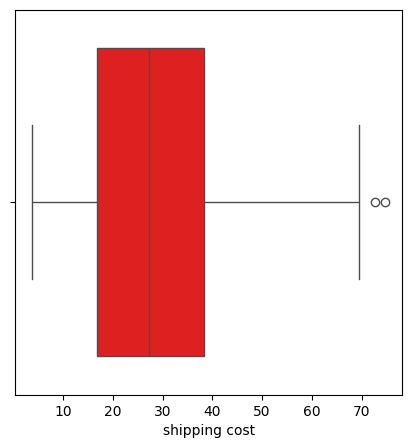

In [87]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'shipping cost', data = df, color = 'red');

In [88]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(df['shipping cost'], i)))

The 99.0th percentile value is 66.50
The 99.1th percentile value is 66.76
The 99.2th percentile value is 66.77
The 99.3th percentile value is 66.90
The 99.4th percentile value is 66.98
The 99.5th percentile value is 67.79
The 99.6th percentile value is 69.09
The 99.7th percentile value is 69.34
The 99.8th percentile value is 69.42
The 99.9th percentile value is 72.74


In [89]:
#This code calculates the median of the “shipping cost” column and assigns this median value to all rows where the “shipping cost” is greater than 70.
mean_shipping_cost = df['shipping cost'].median()
df.loc[df['shipping cost'] > 70, 'shipping cost'] = mean_shipping_cost

- ### Discount

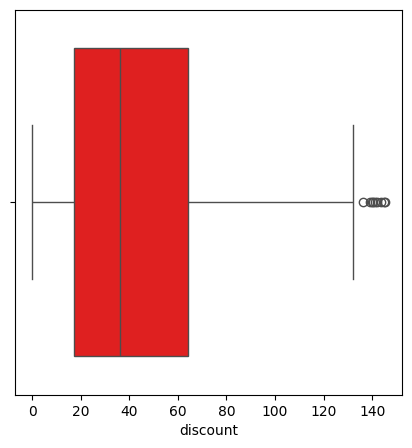

In [90]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'discount', data = df, color = 'red');

In [91]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(df['discount'], i)))

The 99.0th percentile value is 131.46
The 99.1th percentile value is 132.19
The 99.2th percentile value is 136.20
The 99.3th percentile value is 139.07
The 99.4th percentile value is 139.81
The 99.5th percentile value is 140.31
The 99.6th percentile value is 141.16
The 99.7th percentile value is 141.73
The 99.8th percentile value is 143.39
The 99.9th percentile value is 144.83


In [92]:
#This code calculates the median of the “discount” column and assigns this median value to all rows where the “discount” is greater than 140.
mean_shipping_cost = df['discount'].mean()
df.loc[df['discount'] > 140, 'discount'] = mean_shipping_cost

- ## Countplots

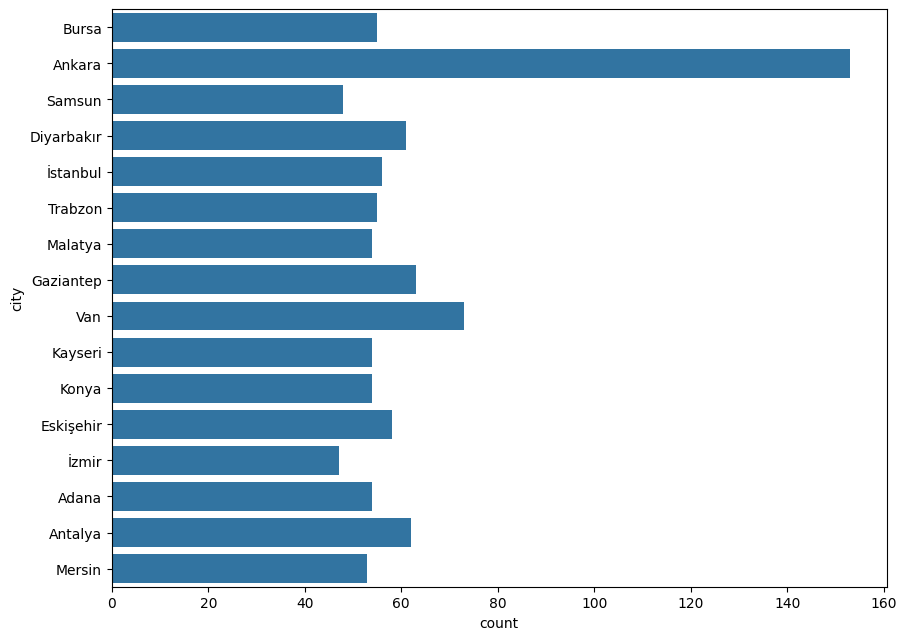

In [93]:
#Creates a horizontal count plot for the “city” column in the DataFrame df with a figure size of 10x7.5 inches, and displays the plot without a title.
plt.figure(figsize = (10, 7.5))
sns.countplot(y = df.city)
plt.title("", fontsize = 20)
plt.show()

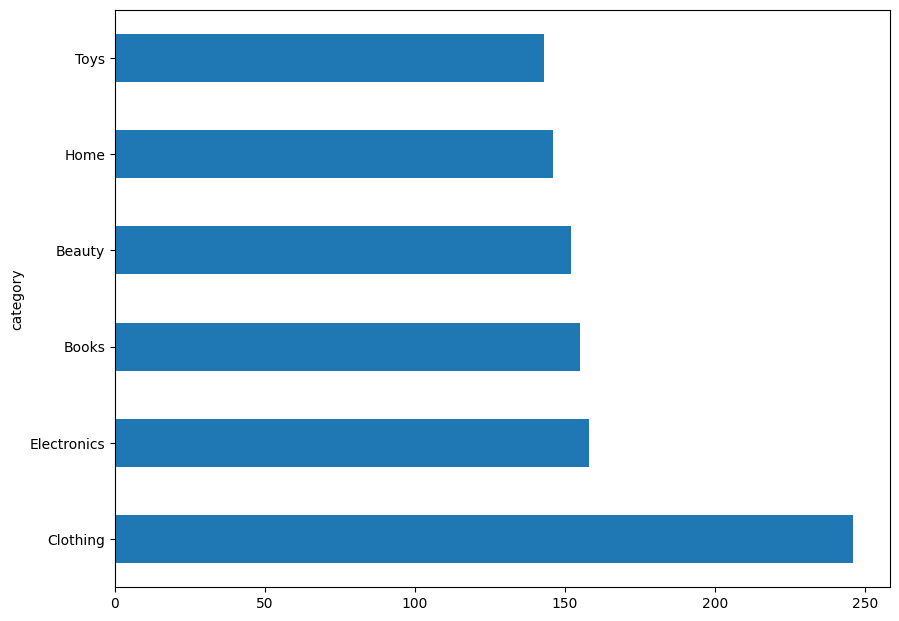

In [94]:
#Creates a horizontal bar plot to display the count of each unique value in the “category” column of the DataFrame df.
plt.figure(figsize = (10, 7.5))
df["category"].value_counts().plot.barh();

C:\Users\m1502\AppData\Local\Temp\ipykernel_3476\1494113661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["payment method"], palette = 'Paired')


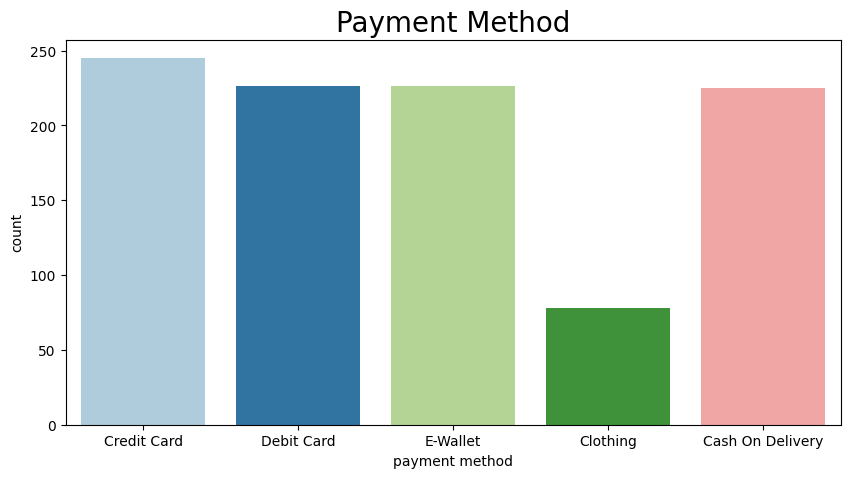

In [95]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["payment method"], palette = 'Paired')
plt.title("Payment Method", fontsize = 20)
plt.show()

C:\Users\m1502\AppData\Local\Temp\ipykernel_3476\3671218917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['device type'].sort_values(ascending = False), palette = 'Dark2');


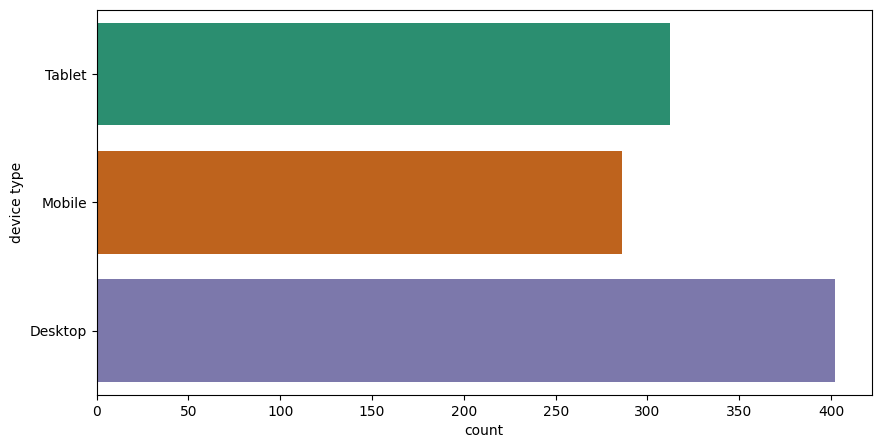

In [96]:
#Creates a horizontal count plot for the “device_type” column in the DataFrame df
plt.figure(figsize = (10, 5))
sns.countplot(y = df['device type'].sort_values(ascending = False), palette = 'Dark2');

C:\Users\m1502\AppData\Local\Temp\ipykernel_3476\1839271126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["promotion used"], palette = 'Set2')


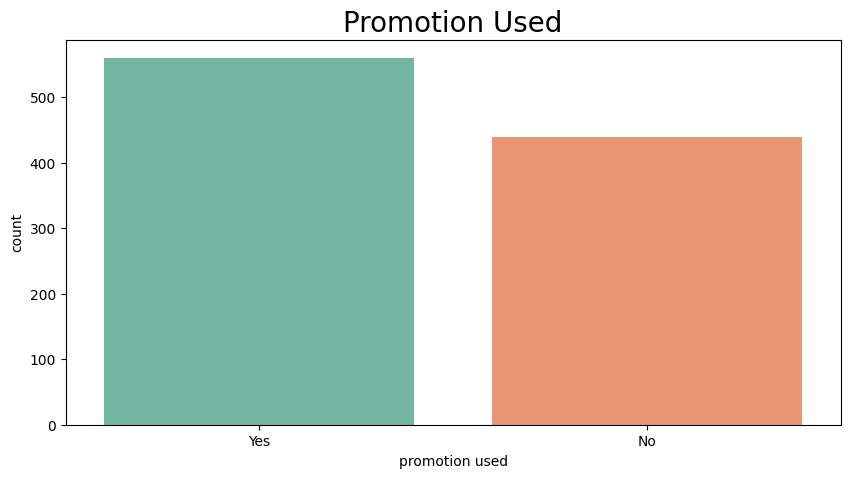

In [97]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["promotion used"], palette = 'Set2')
plt.title("Promotion Used", fontsize = 20)
plt.show()

C:\Users\m1502\AppData\Local\Temp\ipykernel_3476\939545241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["customer segment"], palette = 'Set1')


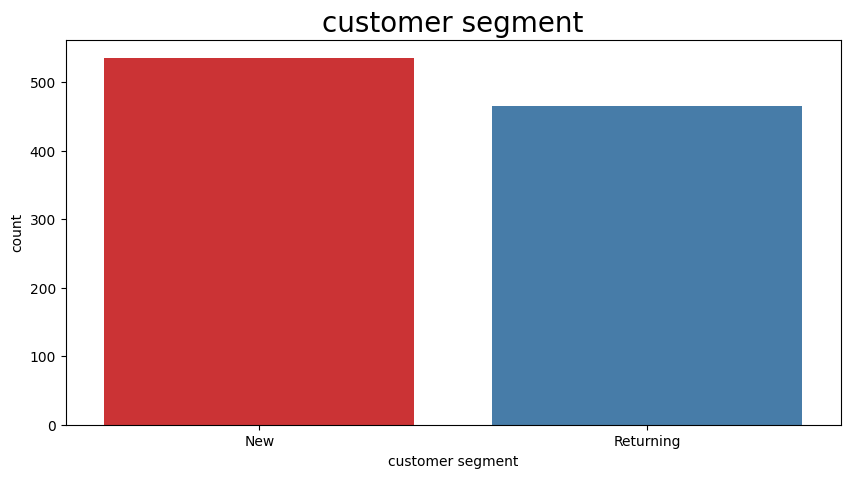

In [98]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["customer segment"], palette = 'Set1')
plt.title("customer segment", fontsize = 20)
plt.show()

C:\Users\m1502\AppData\Local\Temp\ipykernel_3476\3252367756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["items sold"], palette = 'hls')


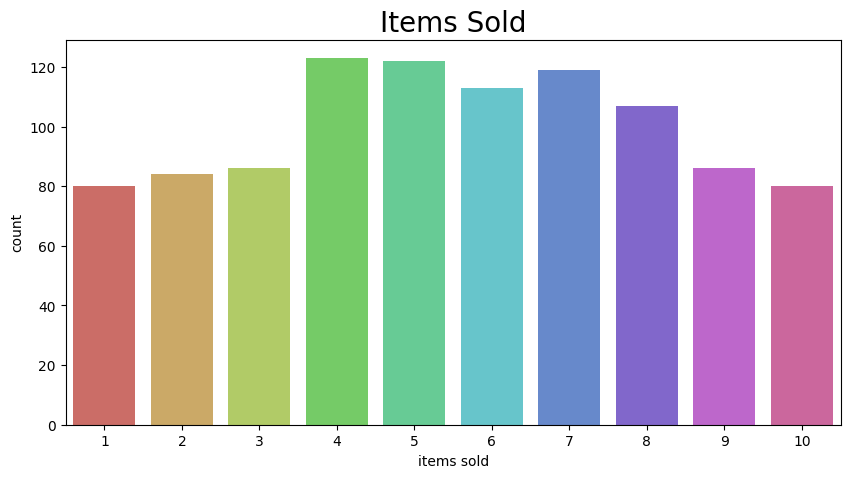

In [99]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["items sold"], palette = 'hls')
plt.title("Items Sold", fontsize = 20)
plt.show()

C:\Users\m1502\AppData\Local\Temp\ipykernel_3476\3958168871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["delivery time"], palette = 'hls')


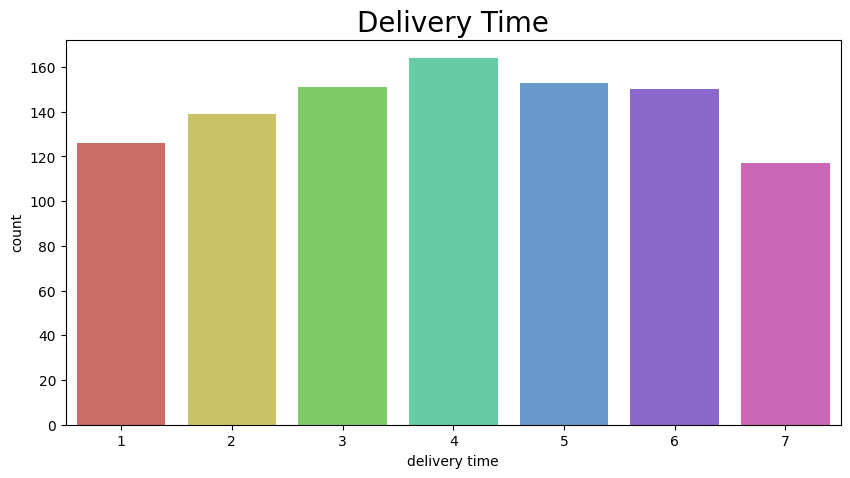

In [100]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["delivery time"], palette = 'hls')
plt.title("Delivery Time", fontsize = 20)
plt.show()

- ## Groupby

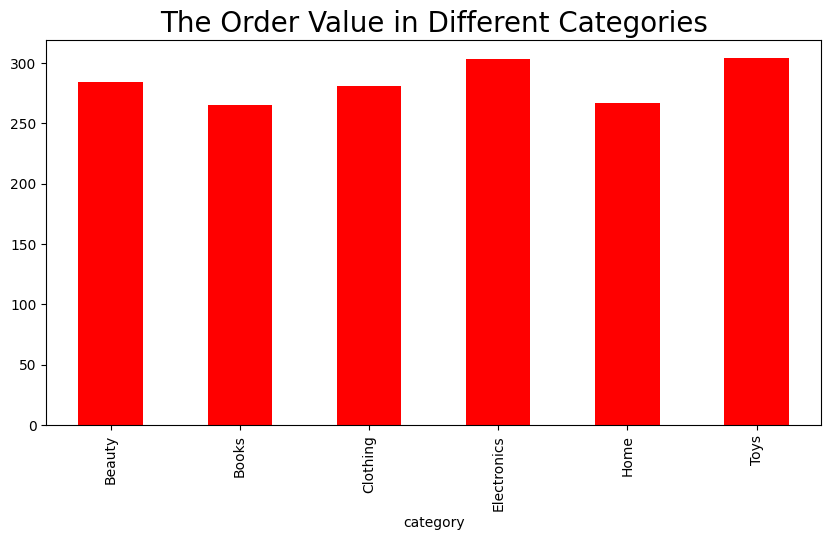

In [101]:
#Creates a bar plot of the average “order_value” for each “category”
plt.figure(figsize = (10, 5))
df.groupby('category')['order value'].mean().plot(kind = 'bar', color = 'r')
plt.title("The Order Value in Different Categories", fontsize = 20)
plt.show()

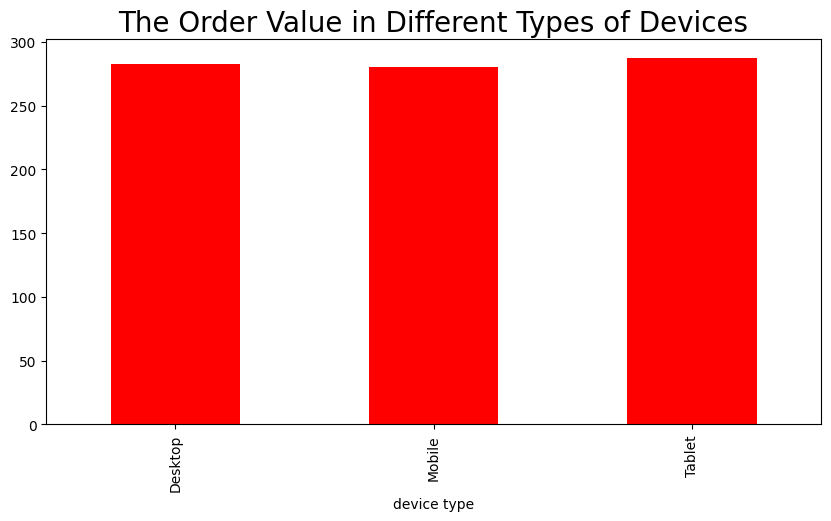

In [102]:
plt.figure(figsize = (10, 5))
df.groupby('device type')['order value'].mean().plot(kind = 'bar', color = 'r')
plt.title("The Order Value in Different Types of Devices", fontsize = 20)
plt.show()

- ## Scatterplot

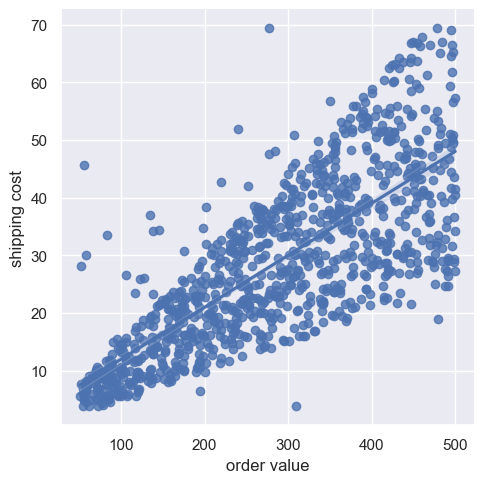

In [103]:
#Creates a scatter plot with a regression line for “order_value” vs. “shipping_cost”.
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'order value', y = 'shipping cost', data = df);

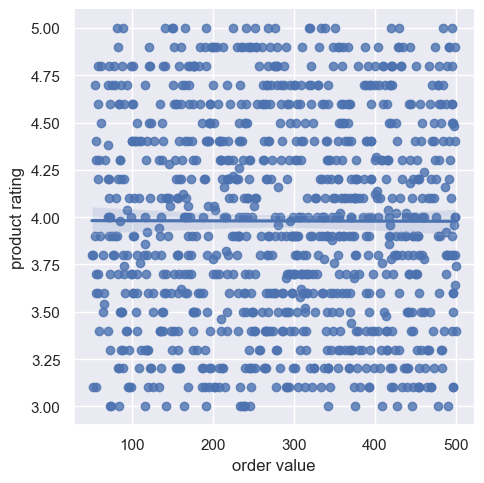

In [104]:
#Creates a scatter plot with a regression line for “order_value” vs. “product_rating”
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'order value', y = 'product rating', data = df);

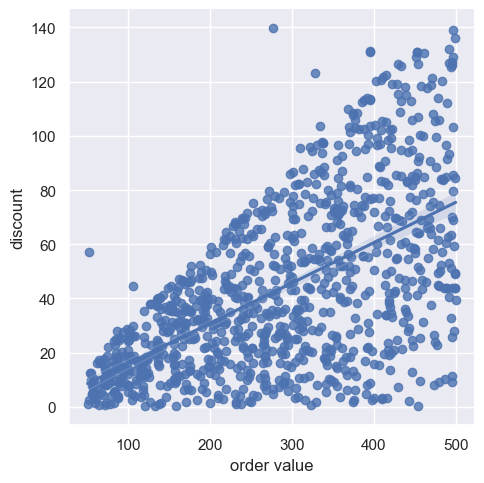

In [105]:
#Creates a scatter plot with a regression line for “order_value” vs. “discount”
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'order value', y = 'discount', data = df);

- ## Heatmap

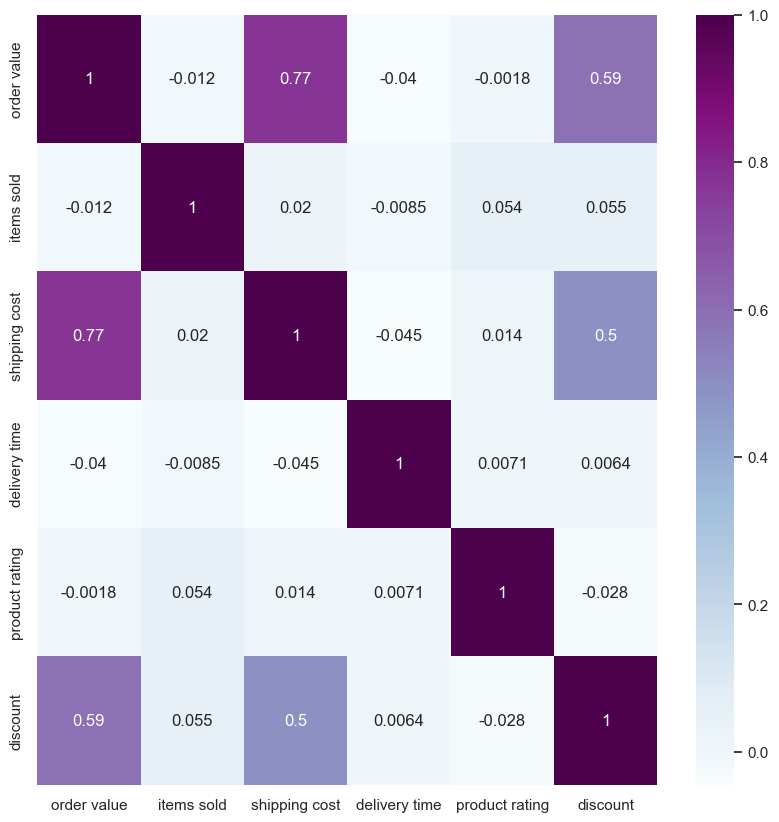

In [106]:
#reates a heatmap of correlations between selected numeric columns in the DataFrame df
plt.figure(figsize = (10, 10))
numeric_columns = ['order value', 'items sold', 'shipping cost', 'delivery time', 'product rating', 'discount']
heatmap_df = df[numeric_columns].corr()
sns.heatmap(heatmap_df,  cmap = 'BuPu', annot = True);

In [107]:
#Saves the DataFrame df to a CSV file named ‘clear.csv’ without including the index.
df.to_csv('clear.csv', index=False)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   city              1000 non-null   object        
 1   category          1000 non-null   object        
 2   payment method    1000 non-null   object        
 3   device type       1000 non-null   object        
 4   promotion used    1000 non-null   object        
 5   customer segment  1000 non-null   object        
 6   order value       1000 non-null   float64       
 7   items sold        1000 non-null   int64         
 8   shipping cost     1000 non-null   float64       
 9   delivery time     1000 non-null   int64         
 10  product rating    1000 non-null   float64       
 11  discount          1000 non-null   float64       
 12  date              1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 109.4+ KB
